In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
df = pd.read_excel('training.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace(r'\W+', '_', regex=True)
df.drop(columns=['region'], inplace=True)
df['vehicle_age'] = df['date'] - df['model_year']
df.drop(columns=['model_year'], inplace=True)
df.head()

,date,vehicle_category,gvwr_class,fuel_type,fuel_technology,electric_mile_range,number_of_vehicles_registered_at_the_same_address,vehicle_population,vehicle_age
0,2019,P,Not Applicable,Gasoline,ICE,Not Applicable,≥4,395883,-1.0
1,2020,P,Not Applicable,Gasoline,ICE,Not Applicable,1,370954,0.0
2,2021,P,Not Applicable,Gasoline,ICE,Not Applicable,1,349406,1.0
3,2019,P,Not Applicable,Gasoline,ICE,Not Applicable,≥4,348475,0.0
4,2019,P,Not Applicable,Gasoline,ICE,Not Applicable,≥4,333296,1.0


### **Preprocessing the Training Dataset**  

We loaded the training dataset using **pandas** and performed several preprocessing steps to clean and standardize the data for analysis.  

1. **Column Name Standardization**  
   - To ensure consistency, we:
     - Stripped any leading or trailing spaces.
     - Converted all column names to lowercase.
     - Replaced non-alphanumeric characters with underscores using **`str.replace(r'\W+', '_', regex=True)`**.  
   - This transformation ensures that column names are uniform and easier to reference in code.  

2. **Removing Redundant Columns**  
   - The **`region`** column was removed because it contained the same value across all rows, meaning it had no meaningful variation for analysis.  

3. **Calculating Vehicle Age**  
   - We created a new column, **`vehicle_age`**, by subtracting the **`model_year`** from the **`date`** column.  
   - This feature provides valuable insight into vehicle aging trends, depreciation, and potential policy implications related to older vehicles.  

4. **Dropping Unnecessary Columns**  
   - Since **`vehicle_age`** now captures the relevant information, the **`model_year`** column was dropped to avoid redundancy.  

5. **Inspecting the Data**  
   - Finally, we displayed the first few rows to verify the structure and ensure correctness.  
   - The dataset includes key features such as **vehicle category, fuel type, fuel technology, GVWR class, electric mile range, and vehicle population**, among others.  

### **Why These Preprocessing Steps Matter?**  
- Standardized column names improve readability and ease of access in subsequent analysis.  
- Removing uninformative columns reduces dataset size and improves efficiency.  
- Creating **`vehicle_age`** enhances the dataset by providing a directly useful feature for age-related analysis.  

These steps prepare the dataset for further exploration, visualization, and modeling using tools like **Seaborn and Matplotlib**.

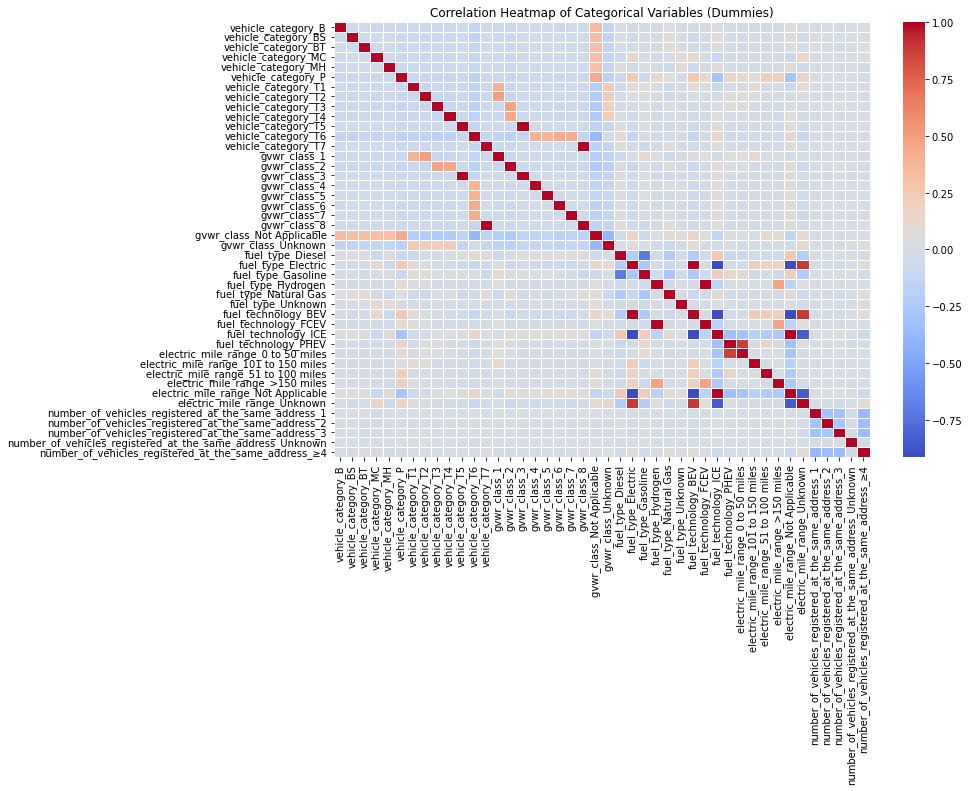

In [3]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_dummies = pd.get_dummies(df[categorical_cols])

corr_matrix = df_dummies.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5, xticklabels=True, yticklabels=True)

plt.title("Correlation Heatmap of Categorical Variables (Dummies)")
plt.show()

In [4]:
df['fuel_info'] = df['fuel_technology'] + ' ' + df['fuel_type']
df.drop(columns=['fuel_technology'], inplace=True)
df.drop(columns=['fuel_type'], inplace=True)
df['vehicle_class'] = df['vehicle_category'] + ' ' + df['gvwr_class'].astype(str)
df.drop(columns=['vehicle_category'], inplace=True)
df.drop(columns=['gvwr_class'], inplace=True)
df.head(10)

,date,electric_mile_range,number_of_vehicles_registered_at_the_same_address,vehicle_population,vehicle_age,fuel_info,vehicle_class
0,2019,Not Applicable,≥4,395883,-1.0,ICE Gasoline,P Not Applicable
1,2020,Not Applicable,1,370954,0.0,ICE Gasoline,P Not Applicable
2,2021,Not Applicable,1,349406,1.0,ICE Gasoline,P Not Applicable
3,2019,Not Applicable,≥4,348475,0.0,ICE Gasoline,P Not Applicable
4,2019,Not Applicable,≥4,333296,1.0,ICE Gasoline,P Not Applicable
5,2021,Not Applicable,1,332578,0.0,ICE Gasoline,P Not Applicable
6,2022,Not Applicable,1,329591,1.0,ICE Gasoline,P Not Applicable
7,2021,Not Applicable,≥4,325602,0.0,ICE Gasoline,P Not Applicable
8,2020,Not Applicable,≥4,324732,-1.0,ICE Gasoline,P Not Applicable
9,2020,Not Applicable,≥4,322706,0.0,ICE Gasoline,P Not Applicable


To analyze the relationships between categorical variables in our dataset, we first transformed them into numerical format using one-hot encoding. We identified all categorical columns and applied **`pd.get_dummies()`**, which converted them into dummy variables while dropping the first category of each to prevent multicollinearity.  

Next, we computed the correlation matrix of these dummy variables and visualized it using a heatmap. The heatmap provides insights into the strength and direction of relationships among categorical features, where:  
- **Red** indicates strong positive correlations.  
- **Blue** indicates strong negative correlations.  

### **Key Findings**  
Upon analyzing the heatmap, we observed **strong correlations between fuel technology, fuel type, vehicle category, and GVWR class**. To further explore these relationships, we created new combined categorical features:  

- **`fuel_info`**: Merges `fuel_technology` and `fuel_type` into a single attribute, providing a unified representation of a vehicle’s fuel system.  
- **`vehicle_class`**: Combines `vehicle_category` and `gvwr_class`, capturing both the type and weight classification of vehicles.  

By examining these combined features, we found that:  
- Certain **fuel technologies are inherently linked to specific fuel types** (e.g., **electric fuel technology is strongly associated with BEV (Battery Electric Vehicle)**).  
- **Vehicle categories correlate strongly with their GVWR class**, reflecting the expected relationship between vehicle type and weight classification.  

Merging related categorical variables into new combined features offers several benefits:  

1. **Dimensionality Reduction**  
   - One-hot encoding expands categorical variables into multiple binary features, increasing dataset size.  
   - By combining variables, we **reduce the number of columns**, making the dataset more compact and manageable.  

2. **Improved Interpretability & Simplicity**  
   - Instead of working with separate `fuel_technology` and `fuel_type` variables, `fuel_info` provides a **single, meaningful** feature.  
   - Similarly, `vehicle_class` simplifies weight-based categorization by integrating GVWR class into the vehicle type.  

3. **Preserving Key Relationships**  
   - Since **fuel technology and fuel type are inherently dependent**, combining them ensures their interaction is explicitly captured.  
   - This also applies to **vehicle category and GVWR class**, as they are naturally correlated.  

These transformations make the dataset **more efficient for analysis and modeling**, particularly for machine learning algorithms that can be affected by high-dimensional data. However, as with any feature engineering decision, we must carefully evaluate whether the reduction in granularity affects model performance.  

In [5]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

print(missing_values)

vehicle_age    603
dtype: int64


### **Handling Missing Values in the Dataset**  

After preprocessing the dataset, we checked for missing values using **`df.isnull().sum()`**, which identifies the number of null entries in each column. To focus on columns with missing data, we filtered the results to display only those with at least one missing value.  

### **Findings**  
The output revealed that the **`vehicle_age`** column contains **603 missing values**. This suggests that some vehicles in the dataset are missing their **model year**, making it impossible to compute their age.  

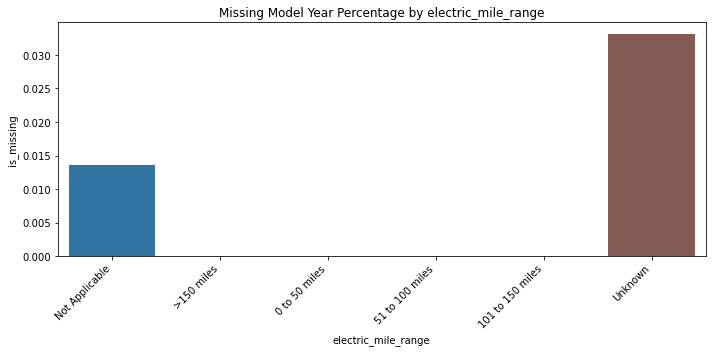

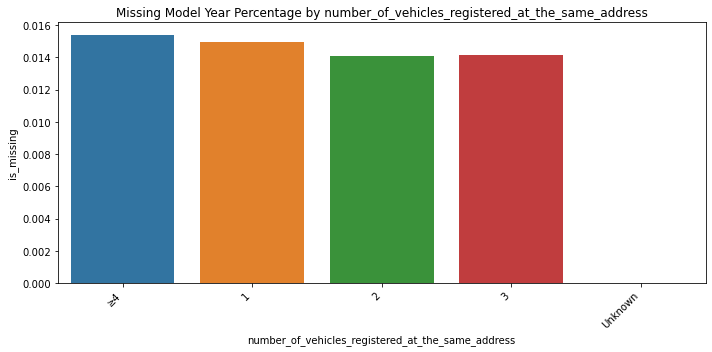

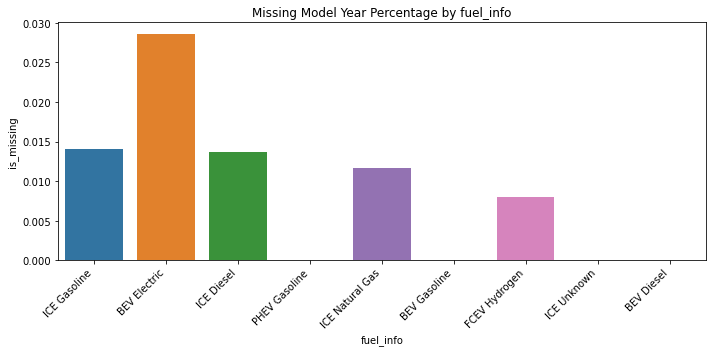

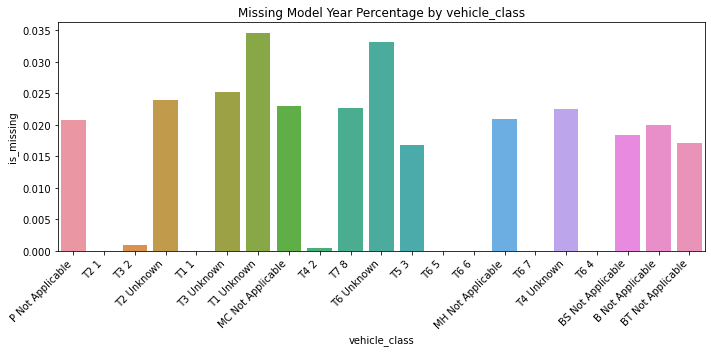

In [6]:
df['is_missing'] = df['vehicle_age'].isnull().astype(int)

for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))  # Increase figure size
    sns.barplot(x=col, y='is_missing', data=df, ci=None)
    plt.title(f"Missing Model Year Percentage by {col}")
    plt.xticks(rotation=45, ha='right')  # Rotate x labels to avoid overlap
    plt.tight_layout()  # Adjust layout to prevent cut-off
    plt.show()

### **Investigating Missing Model Year Values**  

To explore patterns in missing **`vehicle_age`** values, we created a new binary column, **`is_missing`**, which is set to **1** for rows where `model_year` is missing and **0** otherwise. This allows us to analyze which categorical variables might be associated with missing values.  

For each categorical column, we generated **bar charts** showing the proportion of missing model year values across different categories. This visualization helps identify potential data collection issues or systematic trends in missing values.  

### **Key Observations**  
Fuel Info show strong associations with missing vehicle age. Vehicle Class are also linked to missing data.
- This suggests that missing values are not completely random and might be linked to specific characteristics of the vehicles.  


In [7]:
df['vehicle_age'] = df.groupby(['fuel_info', 'vehicle_class'])['vehicle_age'].transform(lambda x: x.fillna(x.median())).astype(int)
df.drop(columns=['is_missing'], inplace=True)
df.head(10)

,date,electric_mile_range,number_of_vehicles_registered_at_the_same_address,vehicle_population,vehicle_age,fuel_info,vehicle_class
0,2019,Not Applicable,≥4,395883,-1,ICE Gasoline,P Not Applicable
1,2020,Not Applicable,1,370954,0,ICE Gasoline,P Not Applicable
2,2021,Not Applicable,1,349406,1,ICE Gasoline,P Not Applicable
3,2019,Not Applicable,≥4,348475,0,ICE Gasoline,P Not Applicable
4,2019,Not Applicable,≥4,333296,1,ICE Gasoline,P Not Applicable
5,2021,Not Applicable,1,332578,0,ICE Gasoline,P Not Applicable
6,2022,Not Applicable,1,329591,1,ICE Gasoline,P Not Applicable
7,2021,Not Applicable,≥4,325602,0,ICE Gasoline,P Not Applicable
8,2020,Not Applicable,≥4,324732,-1,ICE Gasoline,P Not Applicable
9,2020,Not Applicable,≥4,322706,0,ICE Gasoline,P Not Applicable


### **Handling Missing Vehicle Age Values and Understanding the Missingness Mechanism**  

#### **Missing at Random (MAR) vs. Missing Completely at Random (MCAR)**  
Our analysis of missing **`vehicle_age`** values revealed that the missingness is **not completely random**. Instead, it is systematically associated with **fuel info and vehicle class**, meaning that the likelihood of missing values depends on these observed attributes. This suggests that the missing data follows a **Missing at Random (MAR)** pattern rather than **Missing Completely at Random (MCAR)**.

---

### **Imputing Missing Vehicle Age Values**  
Since the missing values are structured (MAR), we applied a data-driven imputation approach:  

1. **Grouping by Fuel Info and Vehicle Class**  
   - Because **`fuel_info`** (combining `fuel_technology` and `fuel_type`) and **`vehicle_class`** (combining `vehicle_category` and `gvwr_class`) were strongly associated with missing values, we grouped the dataset by these features.  

2. **Filling Missing Values with the Grouped Median**  
   - Within each **fuel-vehicle category group**, we replaced missing `vehicle_age` values with the **median age of vehicles in the same group**.  
   - This ensures that imputed values align with typical vehicle ages for similar fuel types and weight classifications, reducing bias while preserving data integrity.  

3. **Converting Back to Integer Format**  
   - After imputation, we converted **`vehicle_age`** to integers for consistency.  

4. **Removing the `is_missing` Indicator**  
   - Since all missing values were successfully imputed, we dropped the **`is_missing`** column.  

---

### **Final Outcome**  
- The dataset is now **fully cleaned**, with missing values imputed in a way that maintains meaningful relationships between categorical variables.  
- Using a **grouped median imputation** ensures that missing values are replaced based on relevant characteristics, preventing data distortion.  
- This structured approach **minimizes bias** and **enhances the reliability** of further analysis and modeling.  

With this improved dataset, we are now ready to conduct **deeper exploration, visualization, and predictive analysis**.

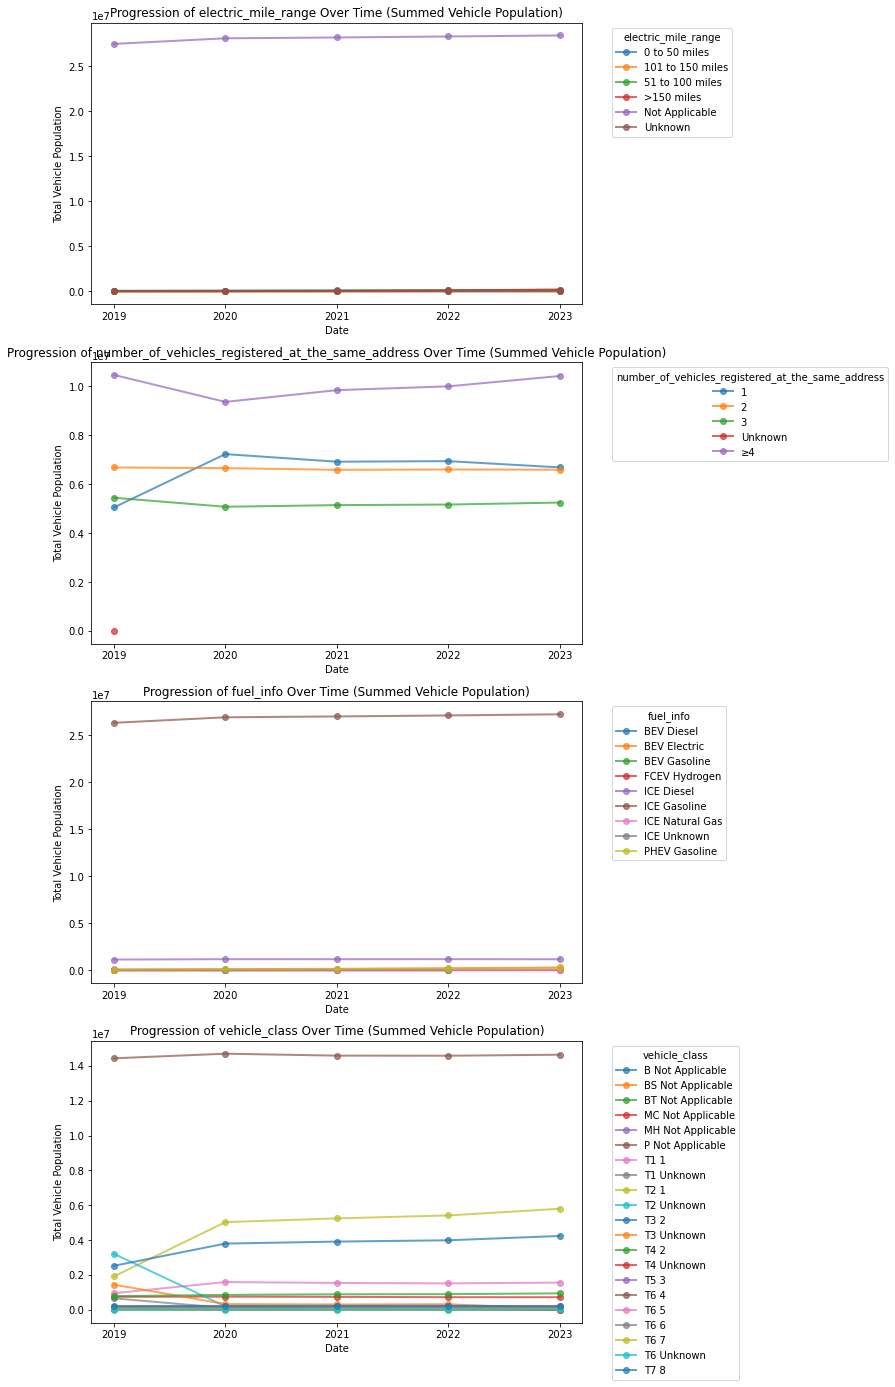

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, len(categorical_cols) * 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    
    df_grouped = df.groupby(['date', col])['vehicle_population'].sum().unstack()
    
    df_grouped.plot(kind='line', ax=plt.gca(), marker='o', alpha=0.7, linewidth=2)
    
    plt.title(f"Progression of {col} Over Time (Summed Vehicle Population)")
    plt.xlabel("Date")
    plt.ylabel("Total Vehicle Population")
    
    plt.xticks(df['date'].unique())
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Analyzing the Progression of Categorical Variables Over Time**  

#### **Approach**  
To explore trends in categorical vehicle attributes over time, we:  

1. **Identified all categorical variables** in the dataset.  
2. **Grouped the data by `date` and each categorical column**, summing the total **`vehicle_population`** for each category at each time point.  
3. **Plotted a time-series line chart for each categorical variable**, displaying how the total number of vehicles within each category evolved over time.  
4. **Ensured clarity by using markers and setting x-axis labels to integer dates**, making year-over-year trends easily interpretable.  

---

### **Findings & Analysis**  

In recent years, the population of most features has remained stable with a slight upward trend. However, a few have shown a slight decline, including the number of vehicles registered at the same address as "1", which is decreasing, along with the "Unknown" GVWR truck category.

**Electric Mile Range Trends**  
   - The vast majority of vehicles fall under **"Not Applicable"**, likely representing non-electric vehicles.

**Household Vehicle Registrations**  
   - The **"≥4" vehicles per household** category consistently has the highest population, indicating that multi-vehicle households are common.

**Fuel Type & Fuel Technology Evolution**  
   - **ICE (Internal Combustion Engine) Gasoline dominates** the dataset, maintaining a nearly flat trajectory.  
   - **BEV (Battery Electric Vehicles) and other alternative fuels (PHEV, FCEV) remain a small fraction** of the total vehicle population.  

**Vehicle Class Trends**  
   - The **"P Not Applicable"** category has the highest total vehicle population, suggesting that a large proportion of vehicles fall under a non-specified passenger category.  
   - Some **truck classifications (T1-T7)** show gradual increases, which could indicate growth in commercial or heavy-duty vehicle registrations.  

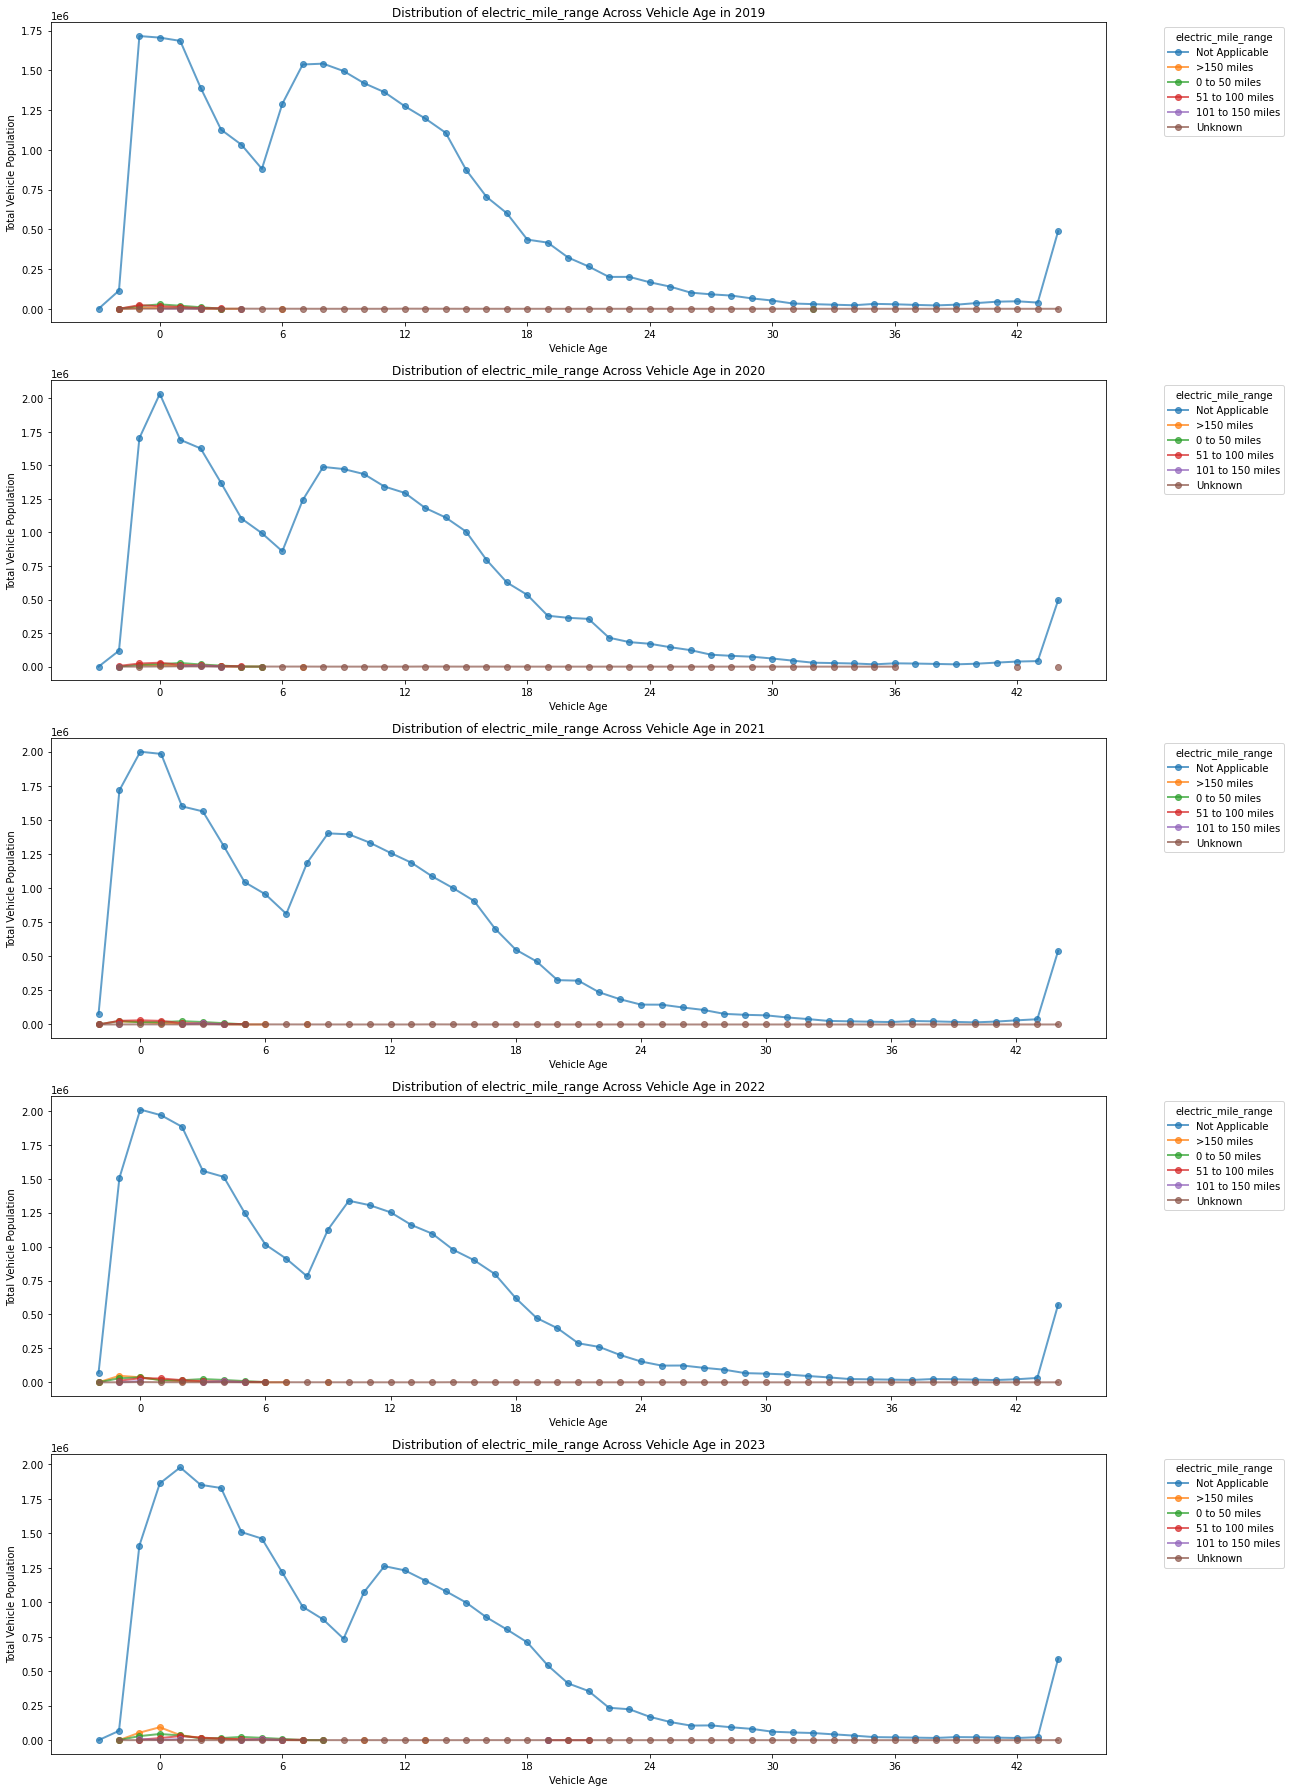

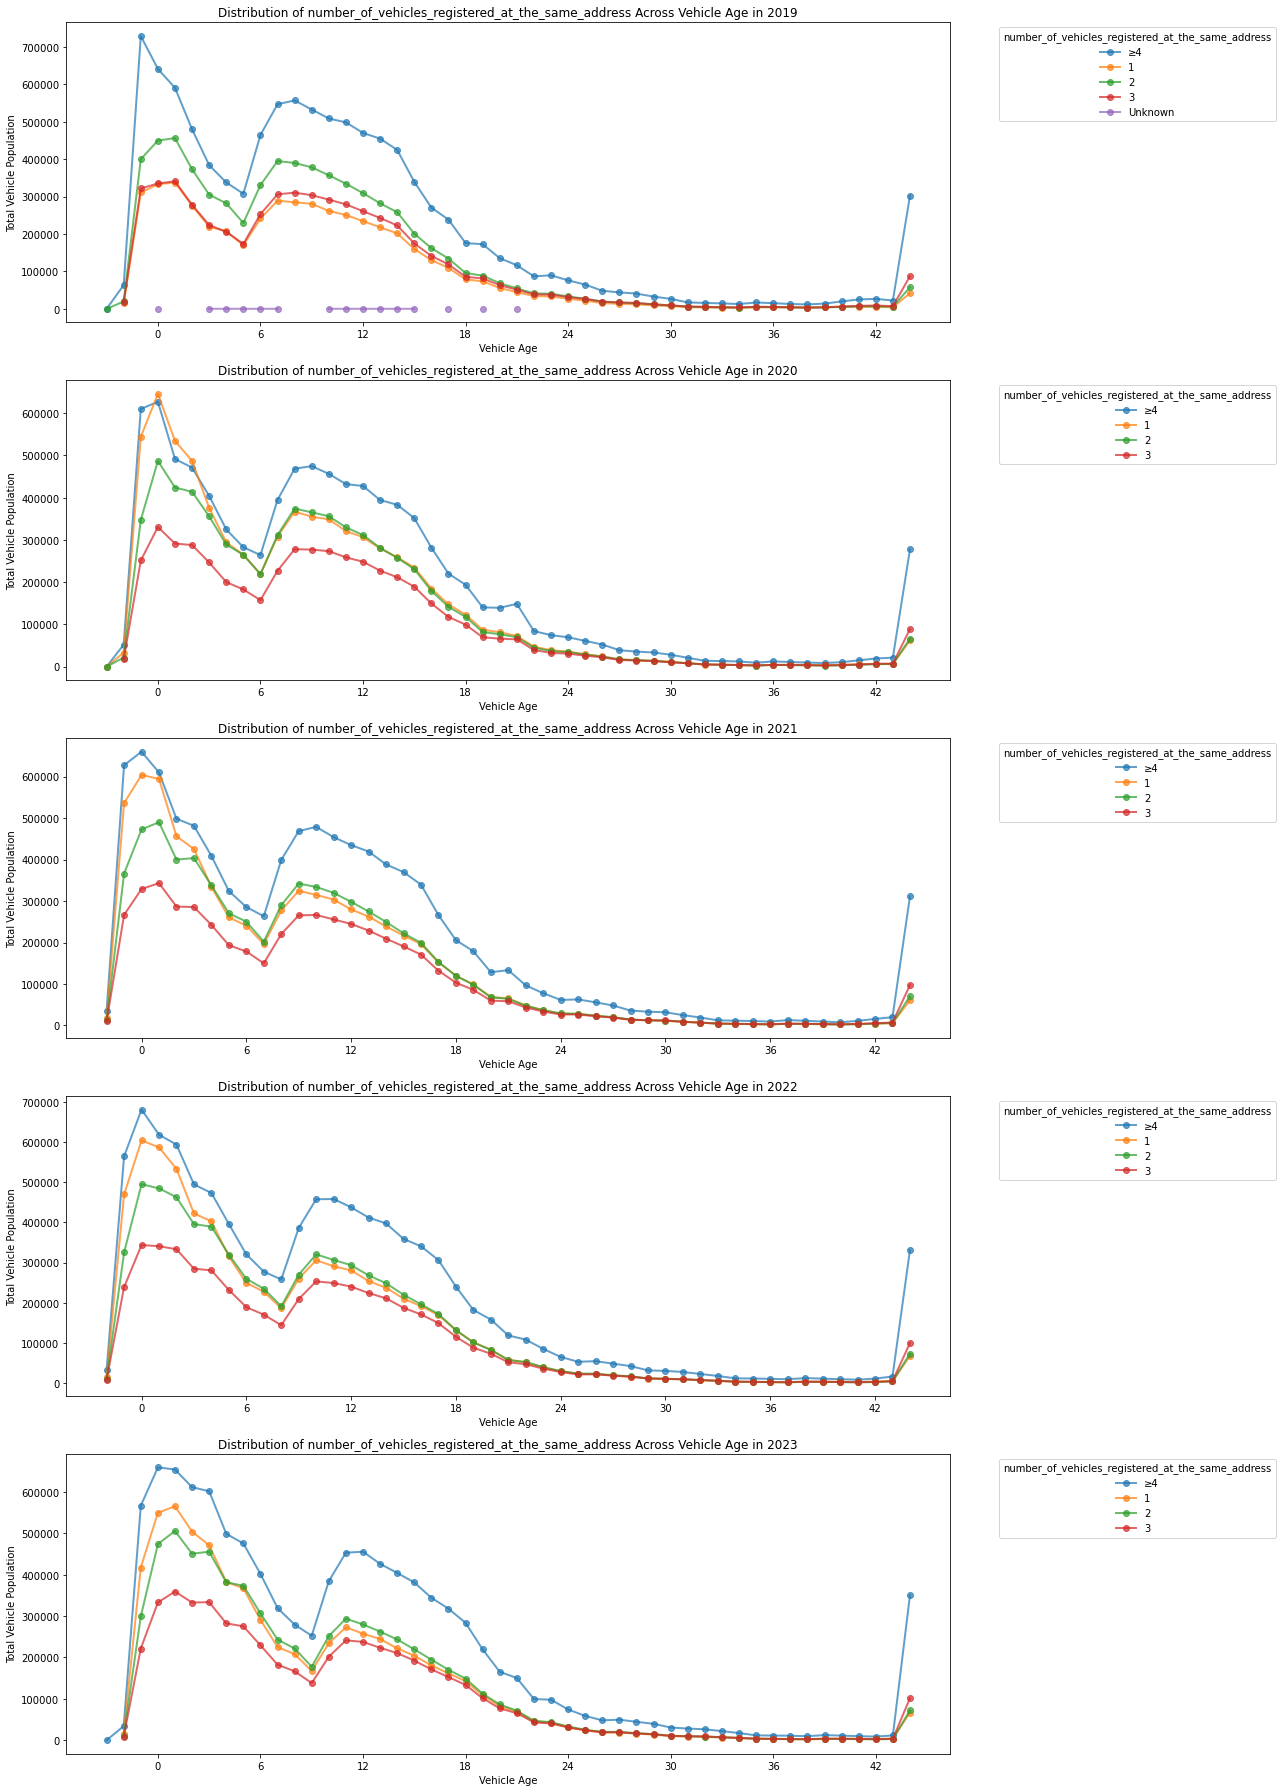

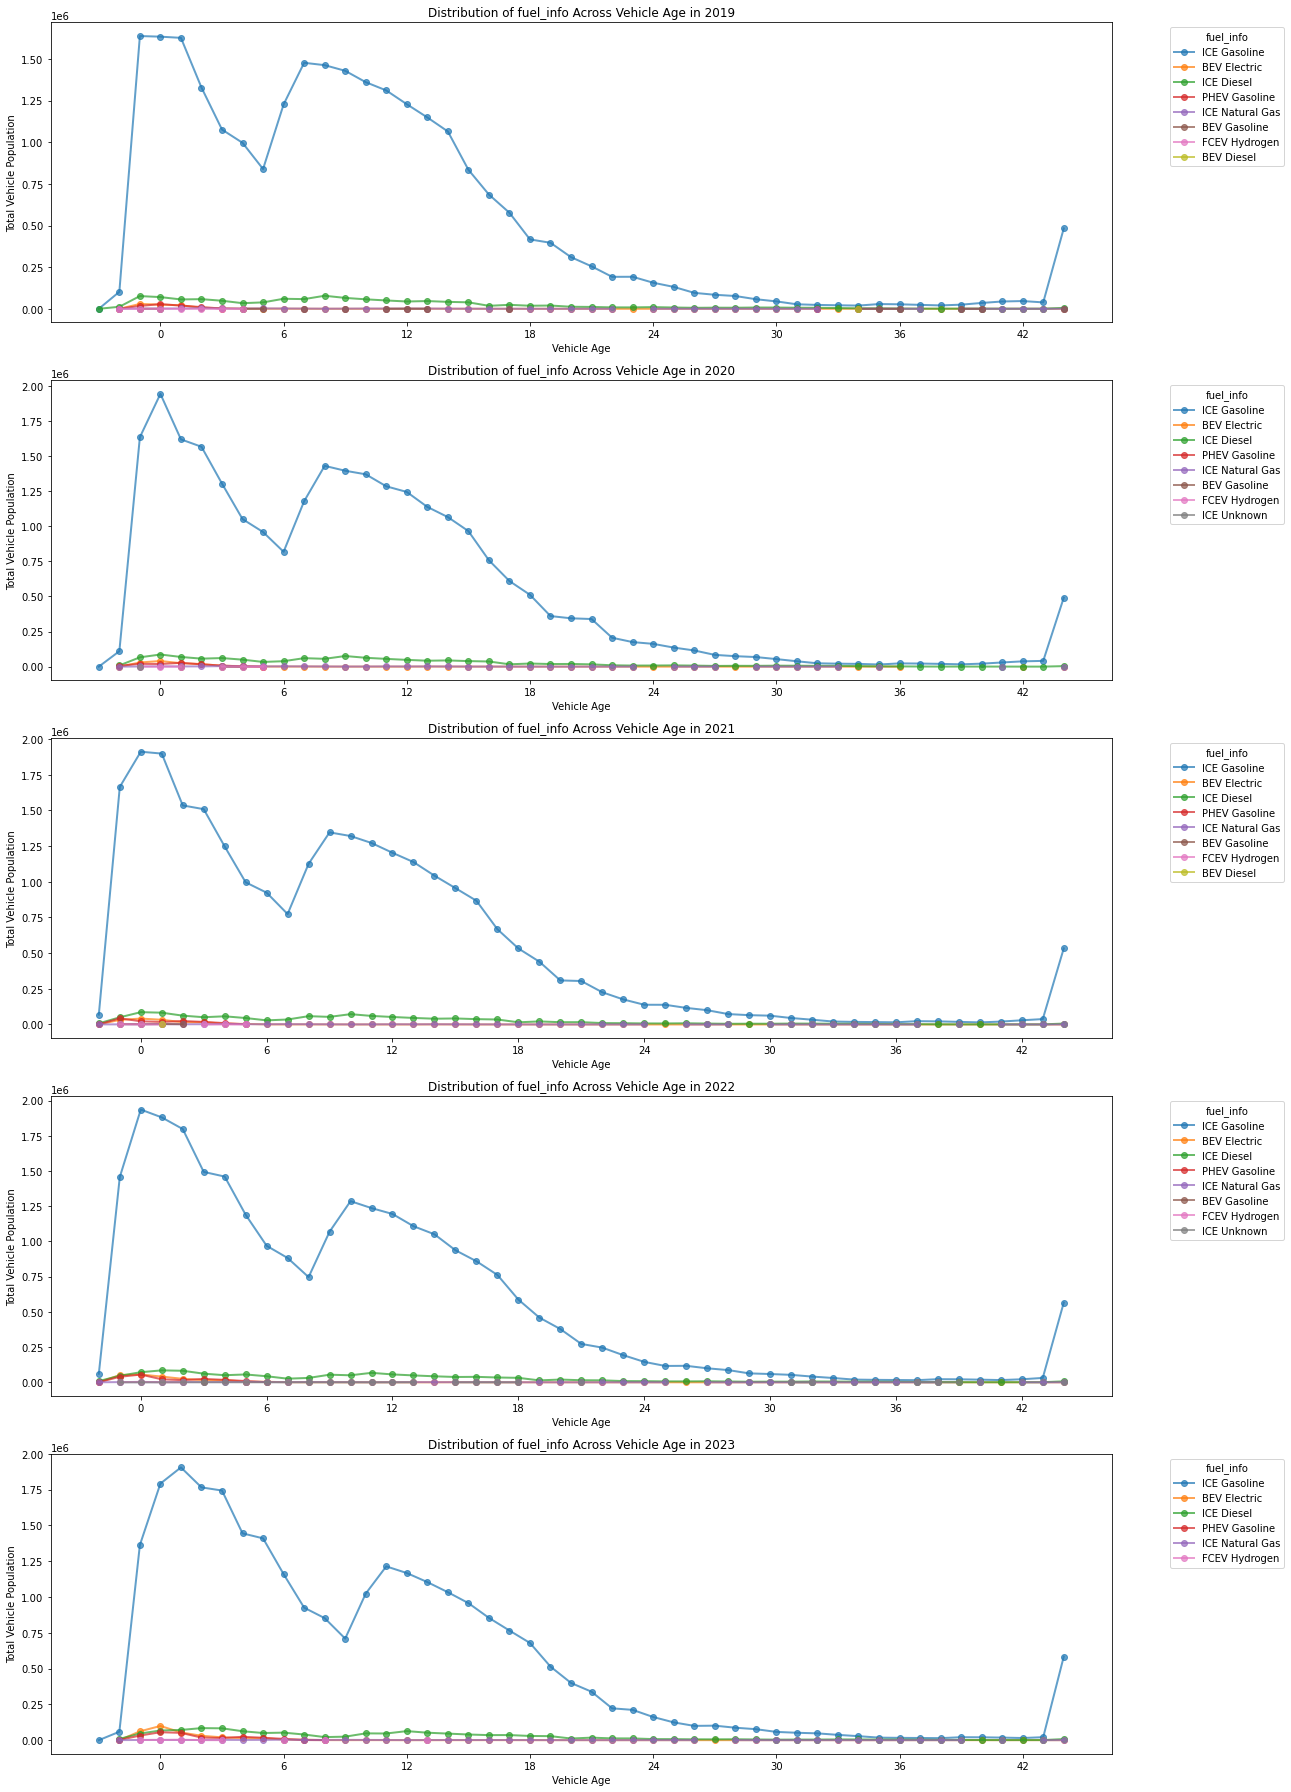

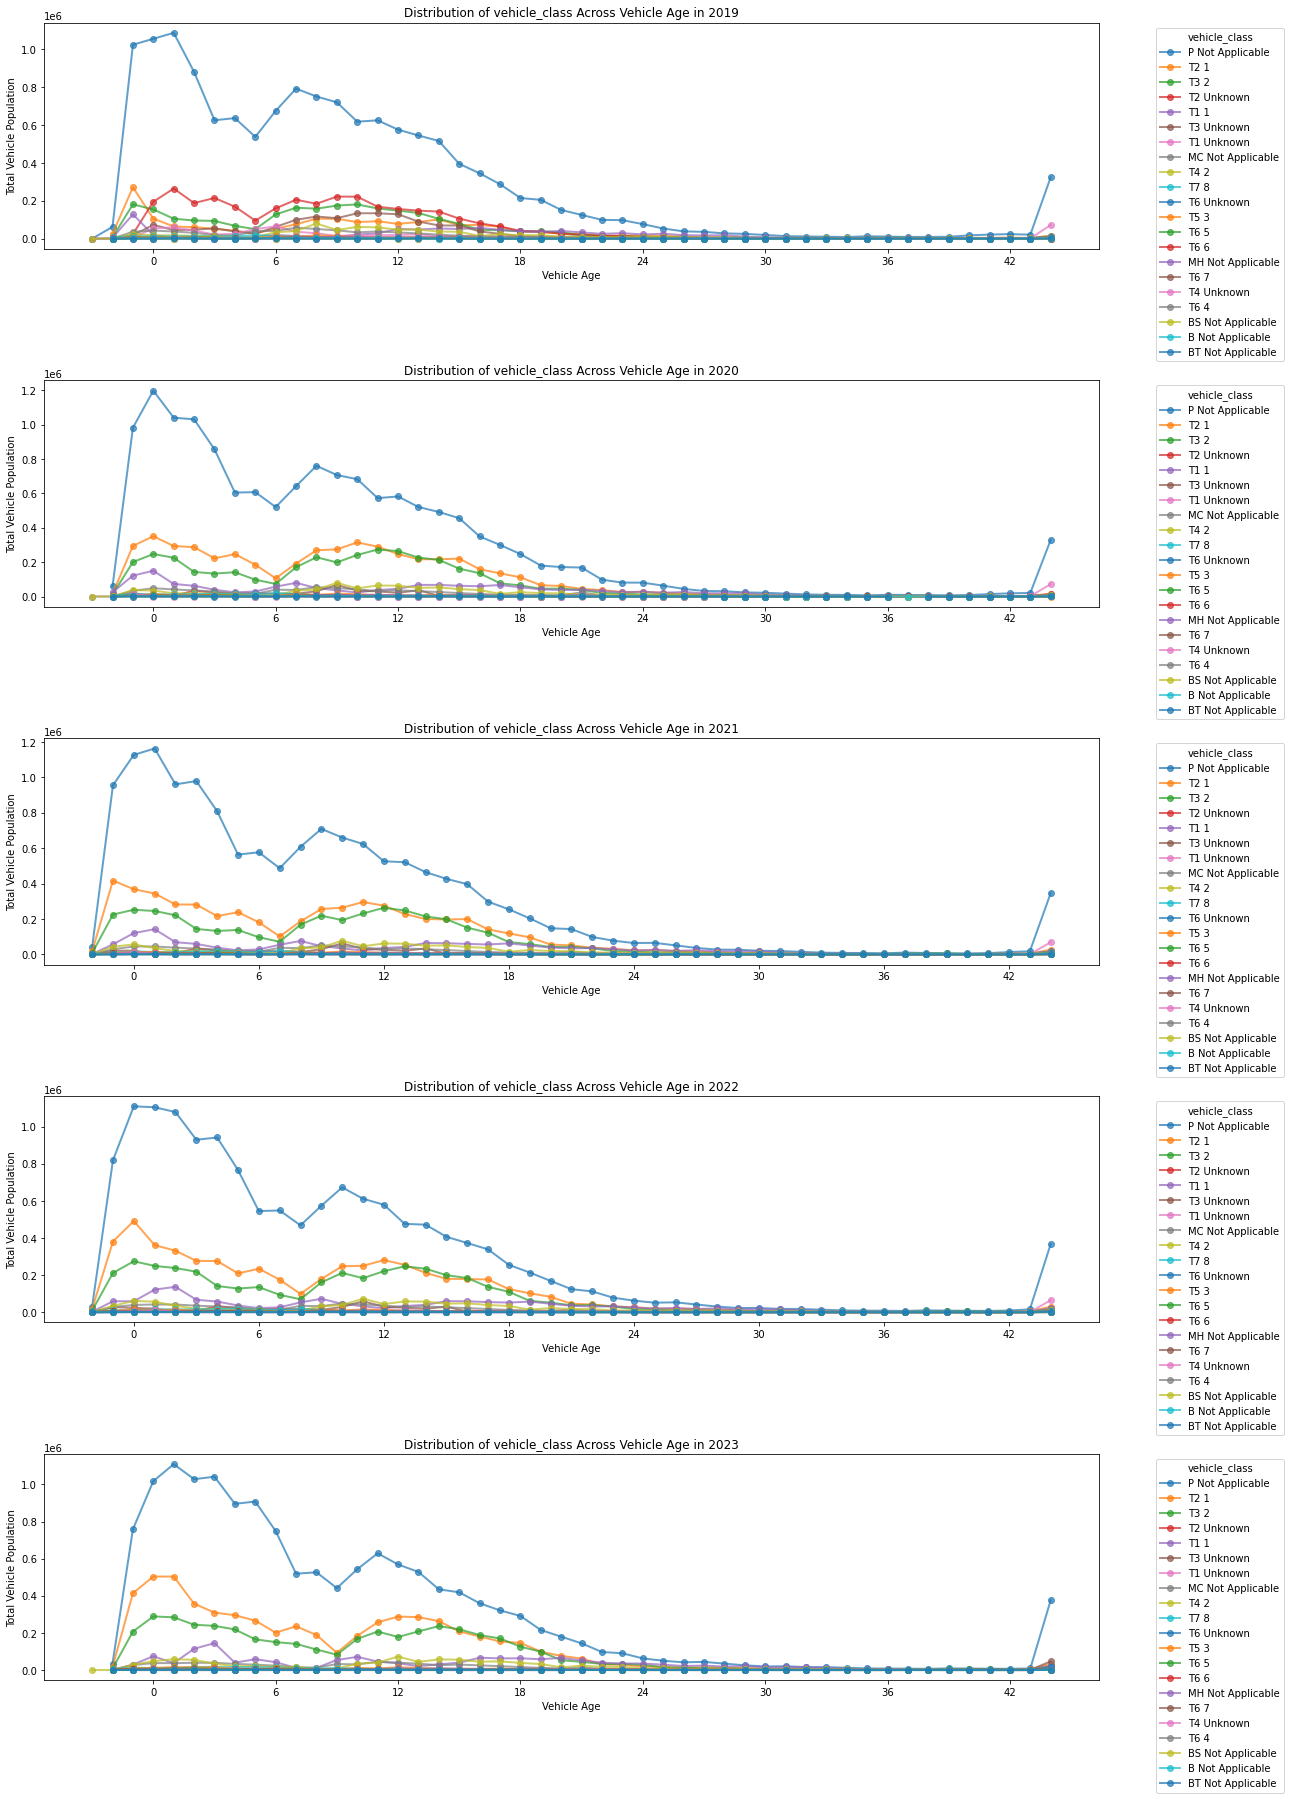

In [10]:
unique_years = sorted(df['date'].unique())

unique_years = sorted(df['date'].unique())

for col in categorical_cols:
    unique_categories = df[col].dropna().unique()  # Get unique values in column
    color_palette = sns.color_palette("tab10", len(unique_categories))  # Generate distinct colors
    color_map = dict(zip(unique_categories, color_palette))  # Map categories to colors

    plt.figure(figsize=(18, len(unique_years) * 5))

    for i, year in enumerate(unique_years, 1):
        plt.subplot(len(unique_years), 1, i)
        df_filtered = df[df['date'] == year]
        df_grouped = df_filtered.groupby(['vehicle_age', col])['vehicle_population'].sum().unstack()

        # Ensure consistent colors for all categories
        for category in unique_categories:
            if category in df_grouped.columns:  # Only plot if category exists in the year
                df_grouped[category].plot(kind='line', ax=plt.gca(), marker='o', alpha=0.7, linewidth=2, 
                                          label=category, color=color_map[category])

        plt.title(f"Distribution of {col} Across Vehicle Age in {year}")
        plt.xlabel("Vehicle Age")
        plt.ylabel("Total Vehicle Population")
        plt.xticks(df_filtered['vehicle_age'].unique())
        plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


From a broad look at the first five panels, they all tell the same basic story:

**“Not Applicable” Dominates**  
   In every chart, the “Not Applicable” category (blue line) is by far the largest throughout almost the entire time span. Whatever these data represent, the vast majority of observations do not fall into a meaningful electric‐range category (i.e.\ they might be non‐EVs or vehicles for which range is irrelevant).

**Sharp Rise at the Start**  
   Each chart shows “Not Applicable” spiking sharply early on (far left), then settling into a somewhat wavy decline. This early spike could reflect an initial wave of entries (registrations, sales, etc.) that were all or mostly non‐EV.

**Gradual Decline to Near Zero**  
   After the first big peak, the blue line steadily trends downward and eventually flattens near zero, suggesting that over time, entries in the “Not Applicable” category dropped dramatically. (One possibility is that the dataset tapers off as we approach more recent or partial data.)

**Tiny Counts for Actual EV Ranges**  
   The red/orange/green/purple series (representing various electric mile ranges—0–50, 51–100, 101–150, or 150+) are essentially hugging the x‐axis. In other words, there are very few data points where an EV range is actually reported, which implies that EV/hybrid vehicles make up a small fraction of the dataset.

**Late Jump in “Unknown”**  
   A final jump in the “Unknown” or “Not Applicable” category (toward the right edge of each chart) could be an artifact of how the data were collected at the end of the period. For instance, any recent records might be incomplete and lumped into “Unknown.”

Overall, the main takeaway is that the dataset is overwhelmingly dominated by vehicles with no electric‐range reporting (the “Not Applicable” line), and only a tiny sliver of records fall into the 0–150+ mile electric‐range categories. The shape of the blue line—initially spiking, then a long downward slope, and a small jump at the end—suggests either changing reporting practices or an underlying shift in data collection over time.

A high‐level takeaway the second five charts is that addresses with 4+ registered vehicles (the blue line) account for the largest share at most points in time, with smaller shares for addresses having 1–3 vehicles. Here’s a more detailed breakdown:

**Strong Early Spike for 4+ Vehicles**  
   All five panels show an initial left‐side surge for the “4+” category. This suggests that, at the earliest times in the dataset, a large number of registrations came from addresses with four or more vehicles.

**Wavelike Decline Across All Categories**  
   After the early peak, each category (4+, 3, 2, 1) experiences a drop, then a secondary hump, and eventually tapers off. They appear to follow roughly parallel patterns: when 4+ dips, so do 1–3, although 4+ remains the largest category overall.

**Very Few “Unknown”**  
   The purple “Unknown” line is near zero (or negligible) in most of the plots, indicating that almost all addresses in the data are assigned a specific vehicle‐count category.

**Late Jump**  
   Toward the right (the most recent period), there is a jump—most prominently for the 4+ category but visible in 1–3 as well. This could represent a batch of late‐reported data or a new wave of registrations.

**Consistent Ranking**  
   In all panels, the order from largest to smallest category remains: 4+ vehicles > 3 vehicles ≈ 2 vehicles > 1 vehicle, with “Unknown” being minimal. That ranking holds through most of the time horizon except for the very earliest data points, where the lines are briefly closer together.

Overall, these graphs suggest that addresses with four or more vehicles have consistently been the most common in this dataset, that there was a surge at the start followed by a slower tapering, and that some final “end‐of‐dataset” bump may indicate newer or partially aggregated information.

A quick reading of next five charts shows a very similar pattern in each panel:

**ICE Gasoline Dominates**  
   The blue line—representing internal combustion (ICE) gasoline vehicles—far exceeds the other fuel types throughout the entire timeline. It starts with a sharp spike on the left (the earliest data), then gradually tapers toward zero (or near zero) on the right.  

**Minor Presence of Other Fuels**  
   All other categories (BEV Electric, ICE Diesel, PHEV, natural gas, etc.) cluster near the x‐axis, signifying that they form a very small share of the overall dataset compared to ICE gasoline. You can see small differences in the heights of these lines, but they remain well below the dominant ICE gasoline line.

**A Noticeable Final Upswing**  
   In most panels, there’s a jump in the ICE gasoline count at the right edge of the chart. A few of the smaller categories also show a subtle uptick near the same point. This could reflect recently added data or a new batch of records.

**Subtle Variation Among “Other Fuels”**  
   Although they’re all relatively small, you can see that diesel (red line), battery electric (green line), and a couple of other categories vary a bit over time, but never come close to overtaking gasoline. Hydrogen or natural gas lines (purple and/or gray) often remain near zero.

**Overall**  
   The key message from these graphs is that—throughout the observed time period—traditional gasoline remains by far the most common fuel type in the dataset, with small but slowly changing proportions of diesel, BEV, PHEV, and other alternative fuels.

A few main themes emerge from the last five panels:

**“P Not Applicable” Dominates**  
   The blue line (P0) is by far the largest category at almost every point. It spikes sharply in the earliest data, remains high through the mid‐range, and then tapers toward zero—only to rise again at the far right (newer data).

**Moderate Waves in T1–T3 Classes**  
   Among the “T” categories (e.g. T1, T2, T3, etc.), you can see small but visible peaks that track somewhat in parallel. T2 and T3 often sit a bit higher than T1 and the others, but all of them are still much smaller than P0 overall. They tend to crest in the midrange of the timeline and decline after that.

**Lesser‐Seen T4–T8/B/M Classes**  
   Classes such as T4, T5, T6, T7, T8, and the B/M categories generally hover near or at the x‐axis. They do show slight fluctuations, but never rise to the levels of T1–T3.

**Final Jump**  
   On the rightmost side (the newest data), P0 “Not Applicable” jumps up again. Some of the smaller classes also tick up slightly, suggesting a wave of newer records (or possibly incomplete data for the most recent period).

**Overall Pattern**  
   In each panel, the story is similar: a large early spike of P0, a mid‐timeline “wave” or plateau among the T1–T3 classes (still overshadowed by P0), and a steady decline across all classes toward near‐zero—except for a small end‐of‐chart rebound. The result is that “P0: Not Applicable” remains the major driver of changes over time, while the other vehicle‐class categories make up a smaller, secondary presence.